## Dissertation Code: Exploratory Data Analysis

#### Student Name - Triparna Chatterjee
#### Student Number - 2433119

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Define sectors for each company
sector_mapping = {
    'Technology': ['AAPL','ADBE','ADP','ASML','CSCO','EBAY','IBM','INTC','MSFT','NVDA','ORCL','TSM','TXN','LRCX','SAP'],
    'Healthcare': ['AMGN','BIIB','JNJ','MRK','UNH','ILMN'],
    'Financial': ['AXP','GS','JPM','TRV','HSBC'],
    'Industrial': ['BA','CAT','HON','MMM','LMT'],
    'Consumer': ['DIS','HD','KO','MAR','MCD','NKE','PG','WMT','WBA'],
    'Energy': ['CVX'],
    'Real Estate': ['EQIX'],
    'Utilities': ['NEE'],
    'Communication': ['NFLX','VZ'],
    'ETFs': ['EEM','EWJ','IJR','QQQ','SPY']
}

In [3]:
# Load the data
df = pd.read_csv("50_stock_data.csv", index_col=0, parse_dates=True)

In [4]:
# Basic Statistics and Data Quality Check

def basic_analysis(df):
    print(" Basic Data Analysis:")
    print(f"Time Period: {df.index[0]} to {df.index[-1]}")
    print(f"Number of trading days: {len(df)}")
    print("\nMissing values by column:")
    print(df.isnull().sum())

In [5]:
basic_analysis(df)

 Basic Data Analysis:
Time Period: 2004-01-02 00:00:00 to 2023-12-29 00:00:00
Number of trading days: 5033

Missing values by column:
AAPL    0
ADBE    0
ADP     0
AMGN    0
ASML    0
AXP     0
BA      0
BIIB    0
CAT     0
CSCO    0
CVX     0
DIS     0
EBAY    0
EEM     0
EQIX    0
EWJ     0
GS      0
HD      0
HON     0
HSBC    0
IBM     0
IJR     0
ILMN    0
INTC    0
JNJ     0
JPM     0
KO      0
LMT     0
LRCX    0
MAR     0
MCD     0
MMM     0
MRK     0
MSFT    0
NEE     0
NFLX    0
NKE     0
NVDA    0
ORCL    0
PG      0
QQQ     0
SAP     0
SPY     0
TRV     0
TSM     0
TXN     0
UNH     0
VZ      0
WBA     0
WMT     0
dtype: int64


In [6]:
# Calculate returns

def calculate_returns(df):
    returns = df.pct_change()
    annual_returns = returns.mean() * 252
    annual_volatility = returns.std() * np.sqrt(252)
    stats_df = pd.DataFrame({
        'Annual Return': annual_returns,
        'Annual Volatility': annual_volatility})
    return returns, stats_df

In [7]:
returns, stats_df = calculate_returns(df)
print("\n Overall Statistics:")
print(stats_df.round(4))


 Overall Statistics:
      Annual Return  Annual Volatility
AAPL         0.3666             0.3303
ADBE         0.2288             0.3393
ADP          0.1258             0.2274
AMGN         0.1095             0.2572
ASML         0.2392             0.3589
AXP          0.1361             0.3504
BA           0.1510             0.3450
BIIB         0.1787             0.4018
CAT          0.1483             0.3151
CSCO         0.0777             0.2857
CVX          0.1028             0.2842
DIS          0.1059             0.2770
EBAY         0.1168             0.3383
EEM          0.0781             0.2818
EQIX         0.2307             0.3567
EWJ          0.0463             0.2057
GS           0.1289             0.3473
HD           0.1486             0.2598
HON          0.1266             0.2533
HSBC         0.0033             0.2707
IBM          0.0568             0.2253
IJR          0.1064             0.2345
ILMN         0.2922             0.4663
INTC         0.0719             0.3144
JNJ

In [8]:
# Detect outliers

def detect_outliers_zscore(df):
    z_scores = (df - df.mean()) / df.std()
    outliers = (z_scores.abs() > 3)  # Threshold for Z-Score
    return outliers

def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

In [9]:
# Identify outliers using Z-Score
zscore_outliers = detect_outliers_zscore(stats_df)

print("\nOutliers based on Z-Score:")
print(zscore_outliers)


Outliers based on Z-Score:
      Annual Return  Annual Volatility
AAPL          False              False
ADBE          False              False
ADP           False              False
AMGN          False              False
ASML          False              False
AXP           False              False
BA            False              False
BIIB          False              False
CAT           False              False
CSCO          False              False
CVX           False              False
DIS           False              False
EBAY          False              False
EEM           False              False
EQIX          False              False
EWJ           False              False
GS            False              False
HD            False              False
HON           False              False
HSBC          False              False
IBM           False              False
IJR           False              False
ILMN          False              False
INTC          False              Fal

In [10]:
# Identify outliers using IQR
iqr_outliers = detect_outliers_iqr(stats_df)

print("\nOutliers based on IQR:")
print(iqr_outliers)


Outliers based on IQR:
None


In [11]:
# Sector Analysis
def sector_analysis(df, returns, sector_mapping):
    sector_stats = {}
    
    for sector, tickers in sector_mapping.items():
        sector_returns = returns[tickers]
        sector_prices = df[tickers]
        
        # Calculate sector statistics
        sector_stats[sector] = {
            'Average Annual Return': sector_returns.mean().mean() * 252,
            'Average Volatility': sector_returns.std().mean() * np.sqrt(252),
            'Average Daily Volume': sector_prices.mean().mean(),
        }
    
    sector_stats_df = pd.DataFrame(sector_stats).T
    return sector_stats_df

In [12]:
sector_stats = sector_analysis(df, returns, sector_mapping)
print("\n Sector Statistics:")
print(sector_stats.round(4))


 Sector Statistics:
               Average Annual Return  Average Volatility  Average Daily Volume
Technology                    0.1768              0.3182               67.8741
Healthcare                    0.1530              0.3090              127.6038
Financial                     0.1051              0.3202               98.2536
Industrial                    0.1203              0.2741              130.3325
Consumer                      0.1077              0.2446               71.6707
Energy                        0.1028              0.2842               99.5818
Real Estate                   0.2307              0.3567              296.8464
Utilities                     0.1278              0.2329               32.0590
Communication                 0.2074              0.3685               92.8173
ETFs                          0.0932              0.2255               97.0484


In [13]:
def analyze_sector_concentration(sector_mapping, df):
    # Calculate market cap (using last price as a proxy)
    latest_prices = df.iloc[-1]
    
    # Calculate sector weights by market value
    sector_values = {}
    total_value = 0
    
    for sector, tickers in sector_mapping.items():
        sector_value = latest_prices[tickers].sum()
        sector_values[sector] = sector_value
        total_value += sector_value
    
    # Calculate percentages
    sector_weights = {sector: (value/total_value)*100 
                     for sector, value in sector_values.items()}
    
    # Create pie chart for value-weighted distribution
    plt.figure(figsize=(12, 8))
    plt.pie(sector_weights.values(),
            labels=[f'{sector}\n({len(sector_mapping[sector])} ' + 
                   ('company' if len(sector_mapping[sector]) == 1 else 'companies') +
                   f', {weight:.1f}%)'
                   for sector, weight in sector_weights.items()],
            autopct='',
            startangle=90)
    
    plt.title('Sector Distribution by Company Count and Market Value Percentage')
    plt.axis('equal')
    plt.show()
    
    # Print comparison with company count
    print("\nSector Distribution Comparison:")
    print(f"{'Sector':<15} {'Companies':>9} {'Count %':>10} {'Value %':>10}")
    print("-" * 45)
    for sector in sector_mapping.keys():
        company_count = len(sector_mapping[sector])
        count_pct = (company_count/sum(len(v) for v in sector_mapping.values()))*100
        value_pct = sector_weights[sector]
        print(f"{sector:<15} {company_count:>9d} {count_pct:>9.1f}% {value_pct:>9.1f}%")
  


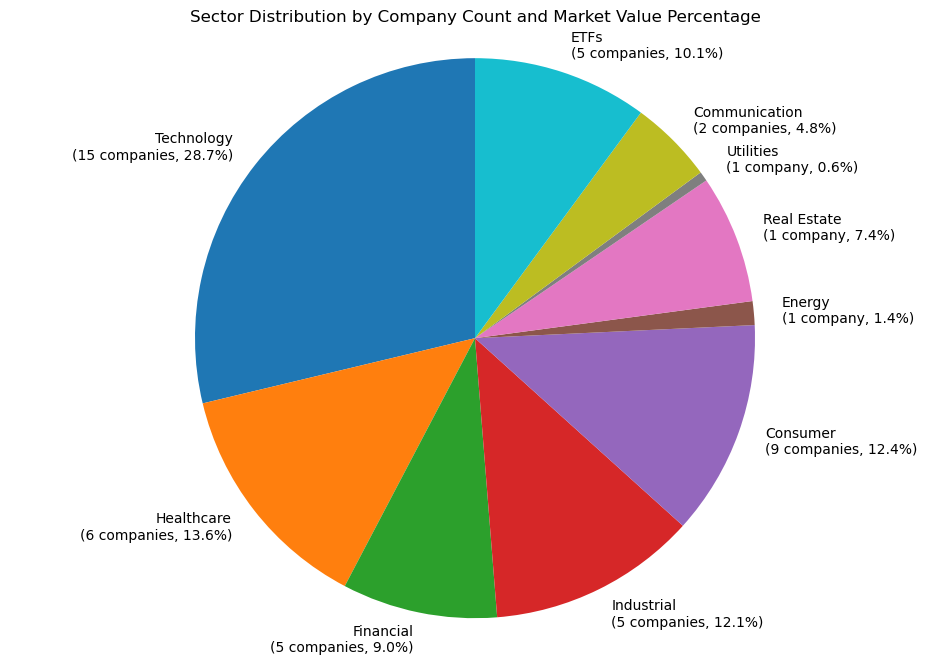


Sector Distribution Comparison:
Sector          Companies    Count %    Value %
---------------------------------------------
Technology             15      30.0%      28.7%
Healthcare              6      12.0%      13.6%
Financial               5      10.0%       9.0%
Industrial              5      10.0%      12.1%
Consumer                9      18.0%      12.4%
Energy                  1       2.0%       1.4%
Real Estate             1       2.0%       7.4%
Utilities               1       2.0%       0.6%
Communication           2       4.0%       4.8%
ETFs                    5      10.0%      10.1%


In [14]:
analyze_sector_concentration(sector_mapping, df)

In [15]:
# Visualization Functions

def plot_sector_performance(df, sector_mapping):
    plt.figure(figsize=(15, 8))
    
    for sector, tickers in sector_mapping.items():
        # Calculate sector average normalized price
        sector_prices = df[tickers].mean(axis=1)
        normalized_prices = sector_prices / sector_prices.iloc[0]
        plt.plot(df.index, normalized_prices, label=sector)
    
    plt.title('Sector Performance Over Time (Normalized)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

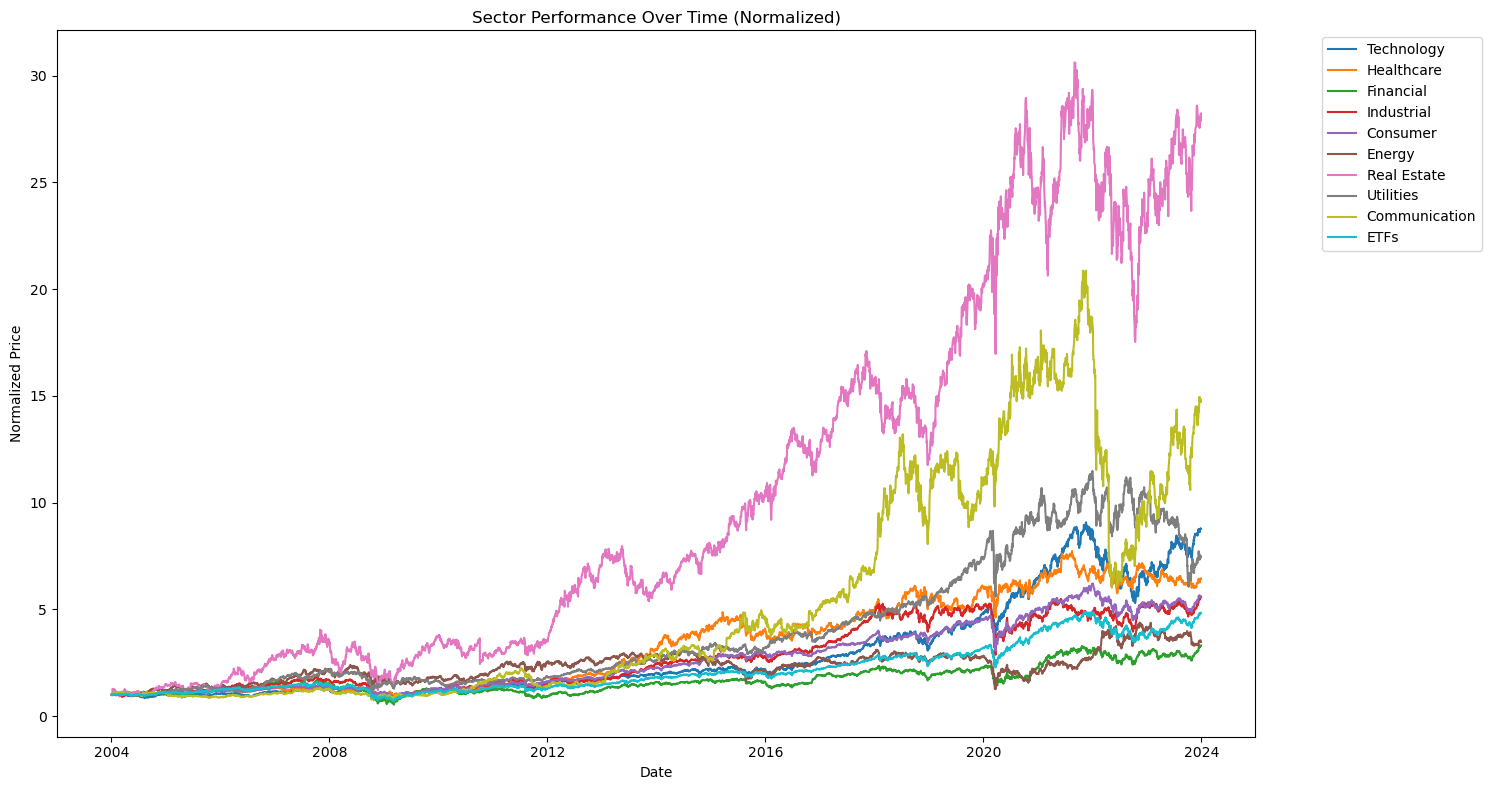

In [16]:
plot_sector_performance(df, sector_mapping)

In [17]:
def plot_risk_return_scatter(stats_df, sector_mapping):
    plt.figure(figsize=(12, 8))
    colors = plt.cm.tab20(np.linspace(0, 1, len(sector_mapping)))
    for (sector, tickers), color in zip(sector_mapping.items(), colors):
        sector_stats = stats_df.loc[tickers]
        plt.scatter(sector_stats['Annual Volatility'], 
                   sector_stats['Annual Return'],
                   label=sector,
                   color=color,
                   alpha=0.6)
    plt.xlabel('Annual Volatility')
    plt.ylabel('Annual Return')
    plt.title('Risk-Return Profile by Sector')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

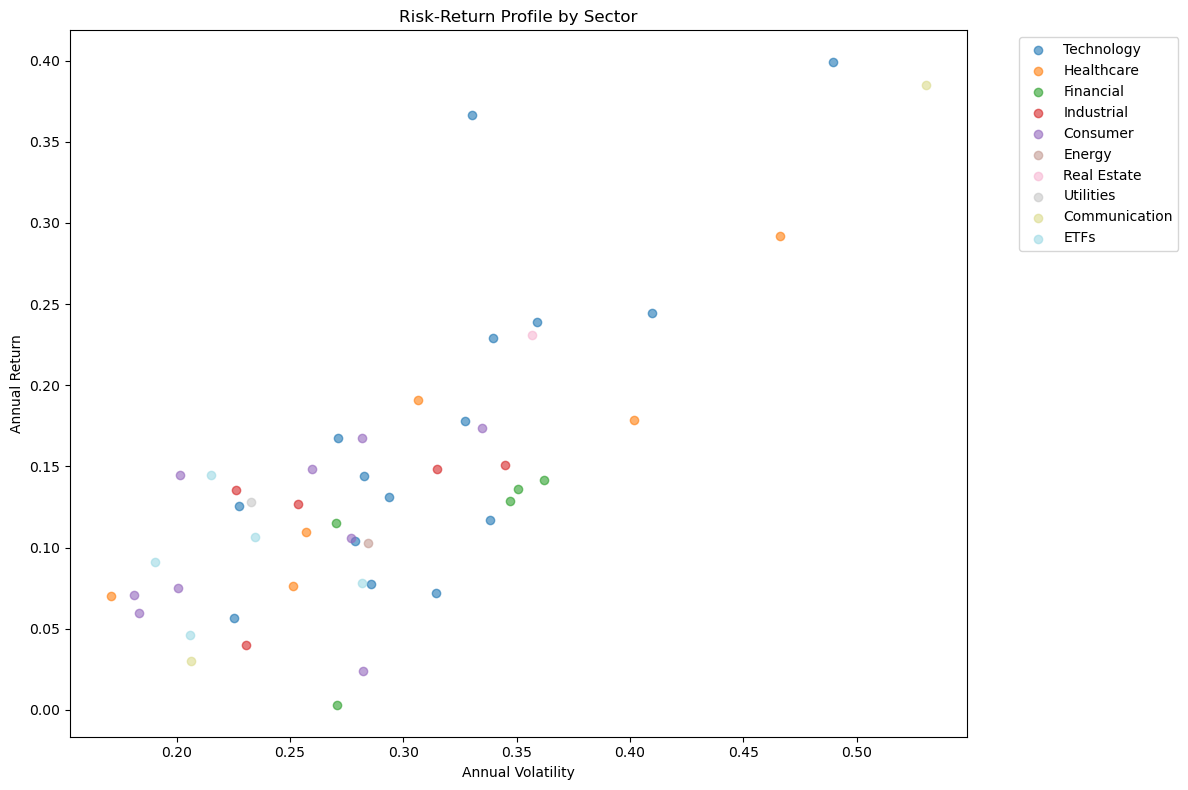

In [18]:
plot_risk_return_scatter(stats_df, sector_mapping)

In [19]:
# Summary Statistics
summary_stats = pd.DataFrame({
    'Min': df.min(),
    'Max': df.max(),
    'Mean': df.mean(),
    'Std': df.std(),
    'Skew': df.skew(),
    'Kurtosis': df.kurtosis()
})

In [20]:
print("\n Summary Statistics for Each Stock:")
print(summary_stats.round(4))


 Summary Statistics for Each Stock:
          Min       Max      Mean       Std    Skew  Kurtosis
AAPL   0.3800  198.1100   42.9225   53.1629  1.4909    0.8745
ADBE  15.9800  688.3700  153.8664  173.0627  1.3130    0.4735
ADP   27.2432  269.9000   93.0608   66.4217  0.9747   -0.3420
AMGN  39.9700  292.3900  130.6802   72.6737  0.4074   -1.2869
ASML  12.6600  889.3300  173.1527  216.9965  1.6146    1.3375
AXP   10.2600  198.3800   80.3983   41.5502  0.9128   -0.0843
BA    29.3600  440.6200  141.8589   93.4288  1.1501    0.4125
BIIB  33.3500  475.9800  185.1032  115.9102  0.0279   -1.5316
CAT   22.1700  298.1200  106.9049   57.9304  1.1405    0.5646
CSCO  13.6200   63.9600   30.9304   12.5318  0.7267   -0.8279
CVX   42.2150  188.0500   99.5818   30.0586  0.3801   -0.0204
DIS   15.5900  201.9100   74.6734   44.9149  0.5328   -0.6854
EBAY   4.3224   80.5900   26.6164   15.6781  0.9783    0.4012
EEM   15.8844   57.9600   39.0381    8.2299 -0.7710    0.4686
EQIX  26.4900  882.8300  296.8464

#### Code References:

1) ADFT Lab Notebooks
2) https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python
3) https://www.kaggle.com/code/bhavyajoshi02022000/outlier-z-score-iqr
4) https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/5-Hierarchical-Risk-Parity.ipynb
5) https://github.com/TheRockXu/Hierarchical-Risk-Parity/blob/master/Hierarchical%20Clustering.ipynb
6) https://github.com/d-jiao/LSTM-For-Stock-Market-Prediction/blob/master/3_LSTM_Model.ipynb
7) https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#6.-Predicting-the-closing-price-stock-price-of-APPLE-inc
8) https://www.kaggle.com/code/malingarajapaksha/stock-prediction-lstm#Modeling
9) https://www.kaggle.com/code/fredblair/transformers-for-stocks#Build-the-model
10) https://www.kaggle.com/code/selcukcan/nlp-9d-lstm-vs-transformers-for-stock-prediction#3.-Implementing-a-Transformer
